In [1]:
from google.colab import drive
drive.mount("/drive")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline
# Just to make plots look better
plt.rcParams["figure.figsize"] = (10,3)
plt.rcParams['axes.grid'] = True
plt.style.use('fivethirtyeight')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['lines.linewidth'] = 3

Mounted at /drive


In [14]:
df = pd.read_csv("/drive/MyDrive/ACA/Projeto/dataset/train_students.csv")
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,1,tcp,smtp,SF,2599,293,0,0,0,0,...,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,Dos
1,0,tcp,login,S0,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,Dos
2,0,tcp,http,SF,280,13254,0,0,0,0,...,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,normal
3,0,tcp,http,SF,230,1582,0,0,0,0,...,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,normal
4,0,tcp,http,SF,218,483,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,tcp,echo,RSTO,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,Dos
103957,0,tcp,telnet,S0,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,Dos
103958,0,tcp,smtp,SF,0,83,0,0,0,0,...,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,normal
103959,50,tcp,telnet,SF,226,2615,0,0,0,1,...,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,R2L


<h2><font color='#3498db'>1. Clean Dataset</font></h2>
Ficar a conhecer o dataset

1. ***Verificar NaNs*** 
2. ***Verificar duplicados*** 
3. ***Substituir valores categoricos por numericos*** 
4. ***Verificar outliers*** -> Interquartile Range (IQR) Method
5. ***Verificar numero unique values*** -> ( Nao sei se faz sentido verificar colunas com pouca variancia)
6. ***Verificar correlaçao***

In [9]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [10]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,44556.000000,4.455600e+04,4.455600e+04,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,...,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000,44556.000000
mean,280.525384,4.138591e+04,3.141765e+03,0.000337,0.020671,0.000269,0.193622,0.004534,0.403245,0.231349,...,184.292463,119.148644,0.532935,0.083918,0.145643,0.030440,0.257684,0.253216,0.133821,0.133765
std,2490.906255,4.436704e+06,7.502865e+04,0.018345,0.241008,0.023207,2.058720,0.073253,0.490555,11.098437,...,98.347779,111.205564,0.447639,0.193612,0.308494,0.109015,0.429524,0.430751,0.320264,0.332295
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,88.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,71.000000,0.590000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.760000e+02,5.410000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.700000,0.620000,0.000000,0.000000
max,57715.000000,6.933756e+08,7.028652e+06,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,1043.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# 1. Verificar Nans

print("Há Nans? ", df.isnull().values.any() )
print(df.isna().values.any())
#print("Percentagem de Nans: ", df.isnull().mean() ) 

Há Nans?  False
False


In [12]:
# 2. Verificar Duplicates

print(len(df))
print(len(df.duplicated(keep = False)) )

44556
44556


In [7]:
print(df["service"].unique())

['smtp' 'login' 'http' 'private' 'telnet' 'other' 'ecr_i' 'iso_tsap'
 'csnet_ns' 'ftp_data' 'imap4' 'ftp' 'time' 'daytime' 'pop_3' 'kshell'
 'uucp' 'name' 'domain_u' 'echo' 'whois' 'eco_i' 'rje' 'finger' 'Z39_50'
 'courier' 'discard' 'domain' 'auth' 'supdup' 'netbios_ns' 'IRC' 'netstat'
 'nnsp' 'netbios_dgm' 'link' 'hostnames' 'klogin' 'http_443' 'systat'
 'uucp_path' 'netbios_ssn' 'exec' 'sunrpc' 'bgp' 'nntp' 'mtp' 'ssh'
 'ntp_u' 'ldap' 'urp_i' 'gopher' 'ctf' 'efs' 'sql_net' 'tim_i' 'vmnet'
 'urh_i' 'shell' 'remote_job' 'X11' 'tftp_u' 'pop_2' 'red_i' 'printer'
 'pm_dump' 'aol' 'http_8001' 'harvest']


In [8]:
# 3. Substituir valores categoricos por numericos
def mapping_column(df, col):
    unique_vals = df[col].unique()
    keys = np.arange(len(unique_vals))
    map_dict = dict(zip(unique_vals, keys))
    print(map_dict)

    df[col] = df[col].map(map_dict)
    return df


df = mapping_column(df, "protocol_type")
df = mapping_column(df, "flag")
df = mapping_column(df, "service")
df["attack_type"] = df["attack_type"].map({"normal": 0, "Dos": 1, "R2L": 2, "U2R": 3, "Probe": 4})

{'tcp': 0, 'udp': 1, 'icmp': 2}
{'SF': 0, 'S0': 1, 'RSTO': 2, 'REJ': 3, 'SH': 4, 'RSTR': 5, 'S2': 6, 'S3': 7, 'S1': 8, 'RSTOS0': 9, 'OTH': 10}
{'smtp': 0, 'login': 1, 'http': 2, 'private': 3, 'telnet': 4, 'other': 5, 'ecr_i': 6, 'iso_tsap': 7, 'csnet_ns': 8, 'ftp_data': 9, 'imap4': 10, 'ftp': 11, 'time': 12, 'daytime': 13, 'pop_3': 14, 'kshell': 15, 'uucp': 16, 'name': 17, 'domain_u': 18, 'echo': 19, 'whois': 20, 'eco_i': 21, 'rje': 22, 'finger': 23, 'Z39_50': 24, 'courier': 25, 'discard': 26, 'domain': 27, 'auth': 28, 'supdup': 29, 'netbios_ns': 30, 'IRC': 31, 'netstat': 32, 'nnsp': 33, 'netbios_dgm': 34, 'link': 35, 'hostnames': 36, 'klogin': 37, 'http_443': 38, 'systat': 39, 'uucp_path': 40, 'netbios_ssn': 41, 'exec': 42, 'sunrpc': 43, 'bgp': 44, 'nntp': 45, 'mtp': 46, 'ssh': 47, 'ntp_u': 48, 'ldap': 49, 'urp_i': 50, 'gopher': 51, 'ctf': 52, 'efs': 53, 'sql_net': 54, 'tim_i': 55, 'vmnet': 56, 'urh_i': 57, 'shell': 58, 'remote_job': 59, 'X11': 60, 'tftp_u': 61, 'pop_2': 62, 'red_i': 

<ipython-input-9-524d21865eb8>:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


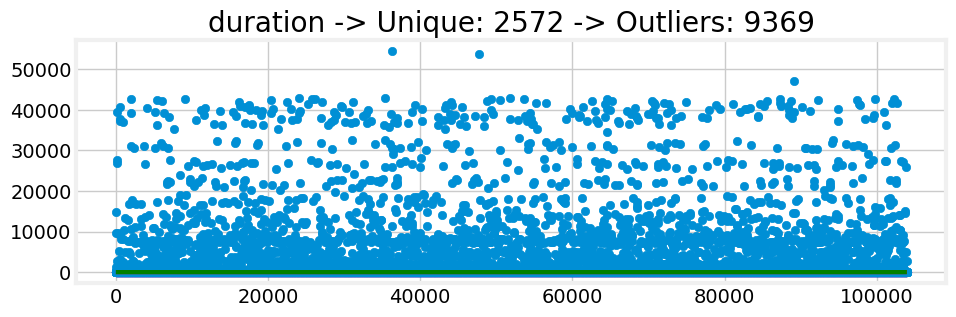

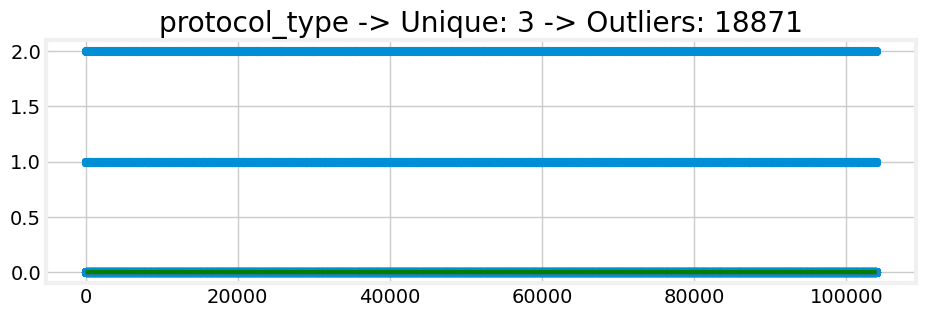

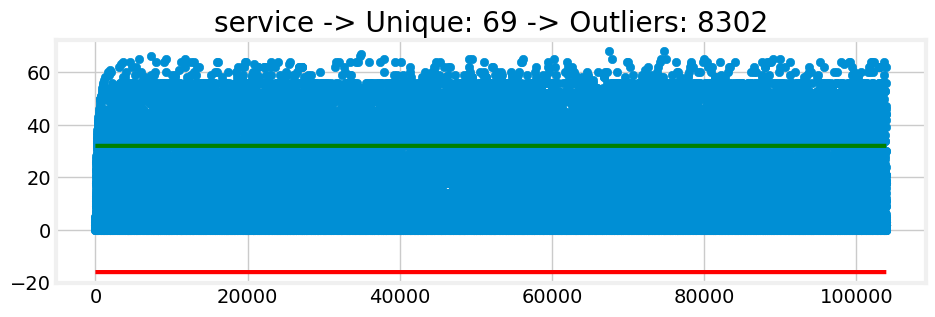

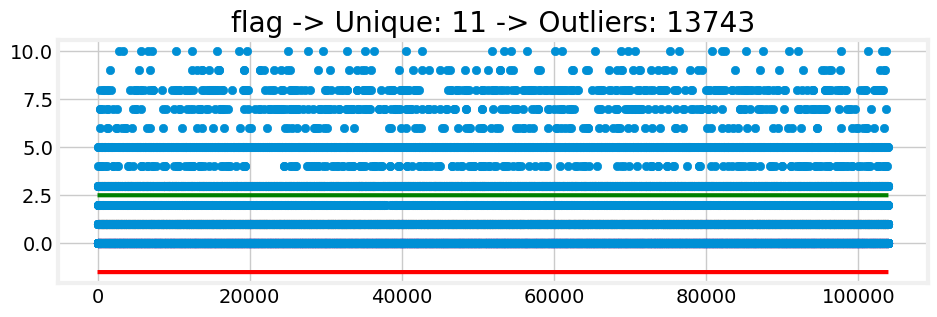

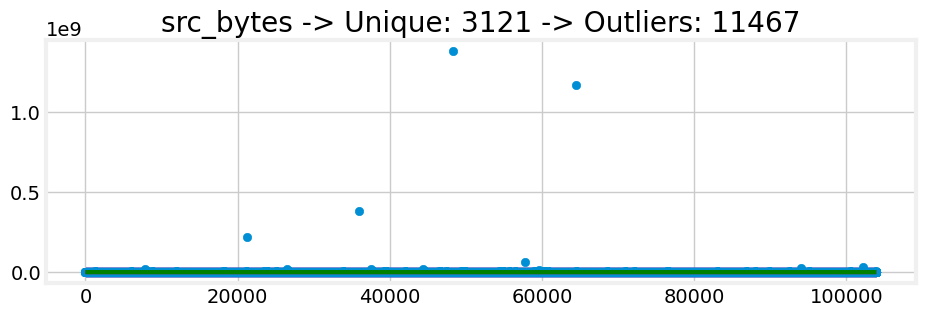

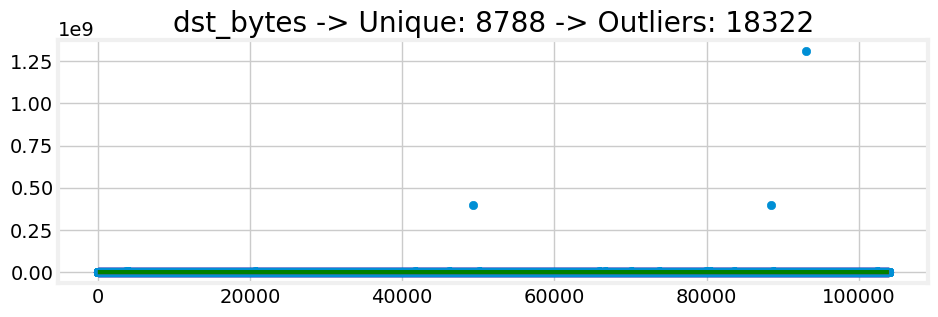

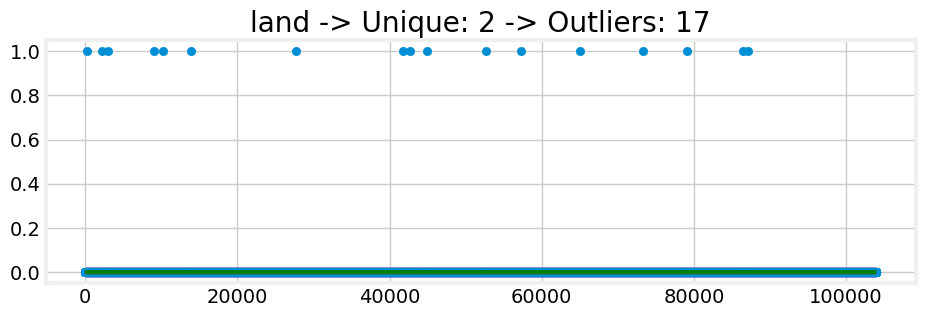

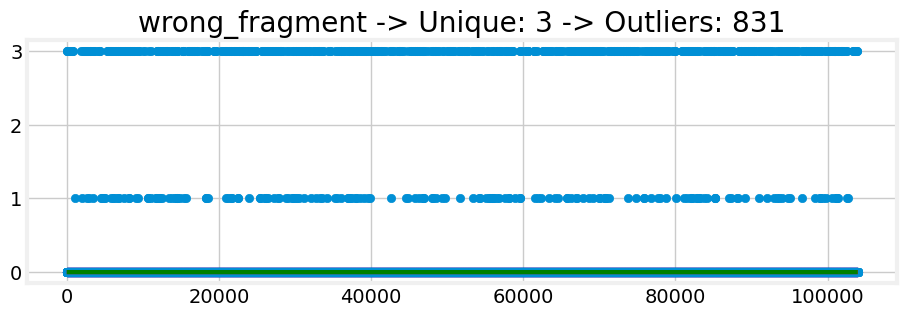

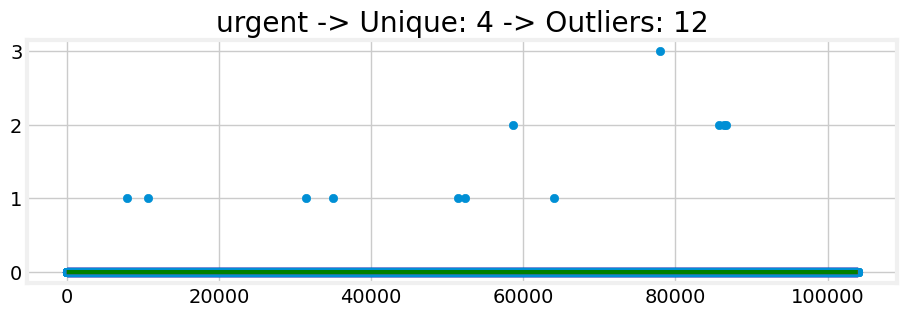

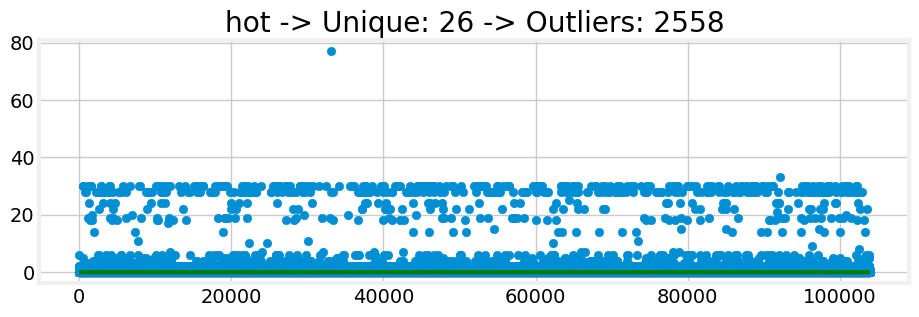

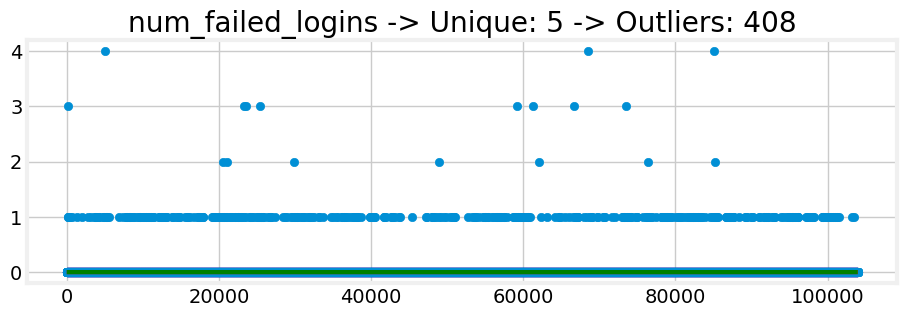

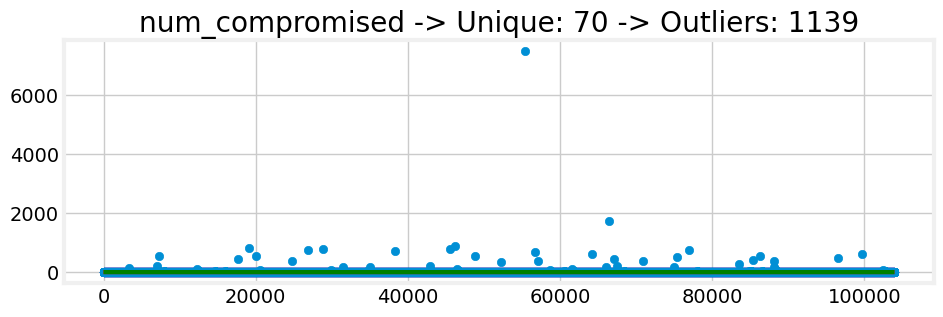

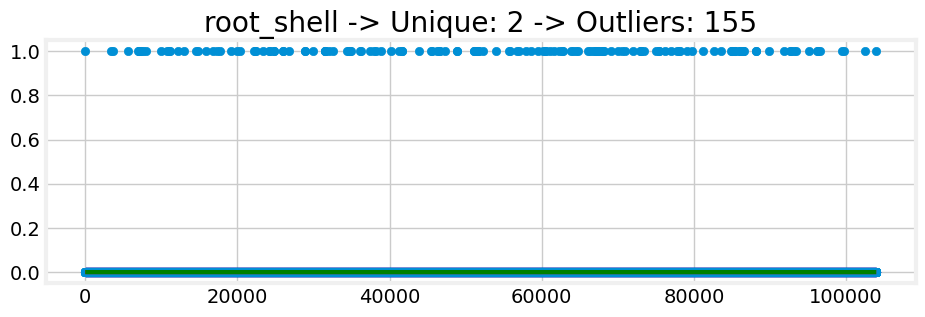

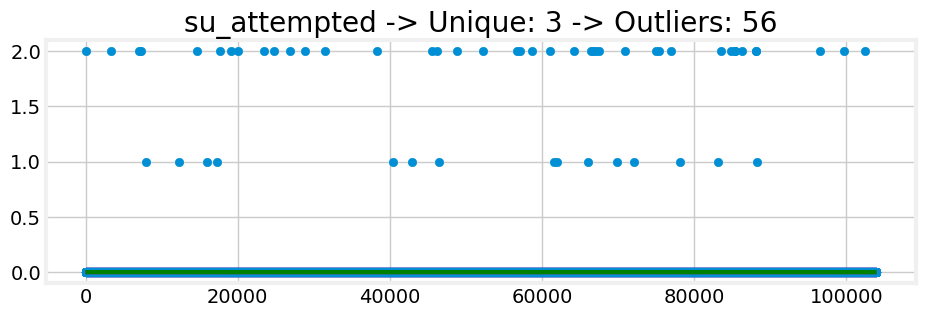

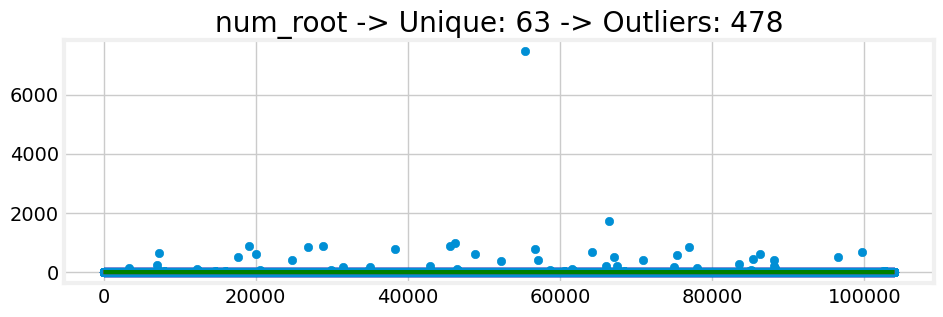

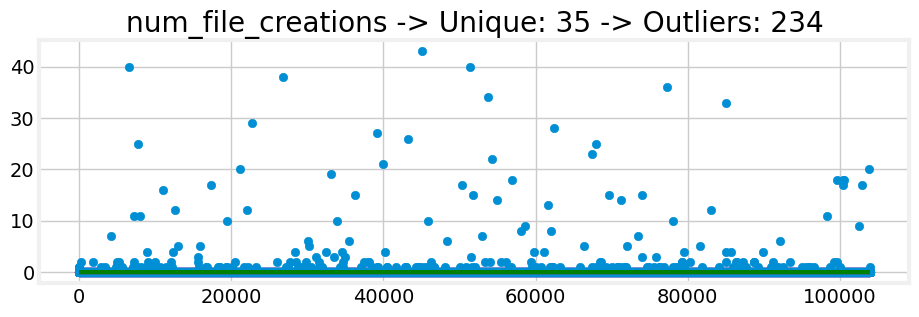

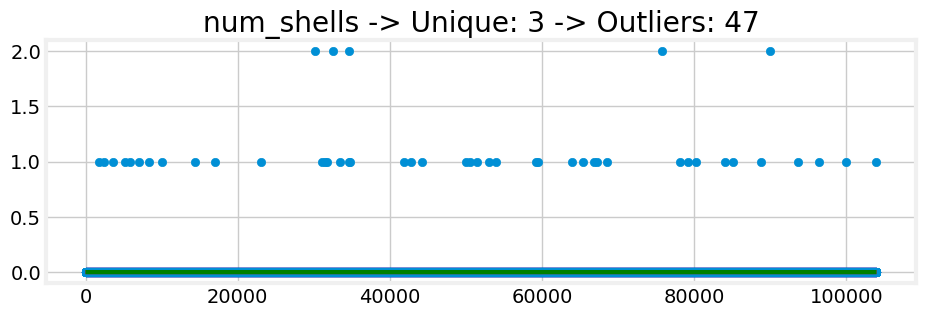

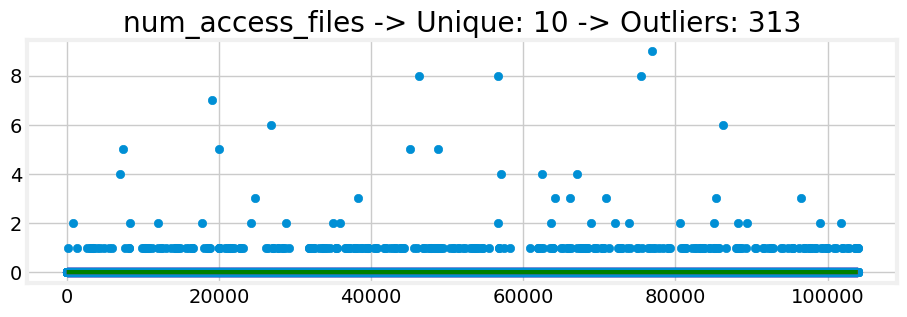

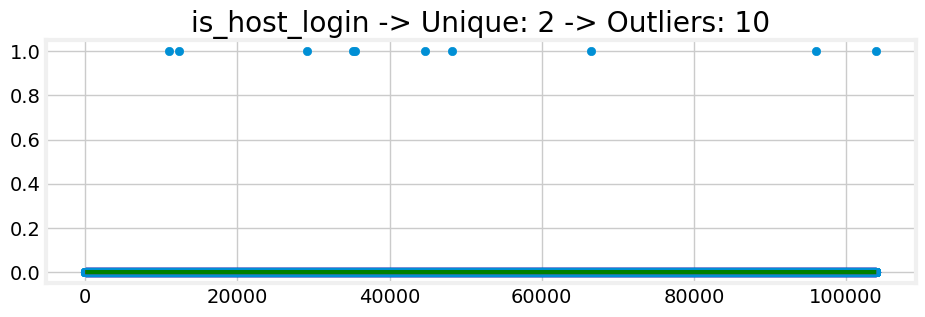

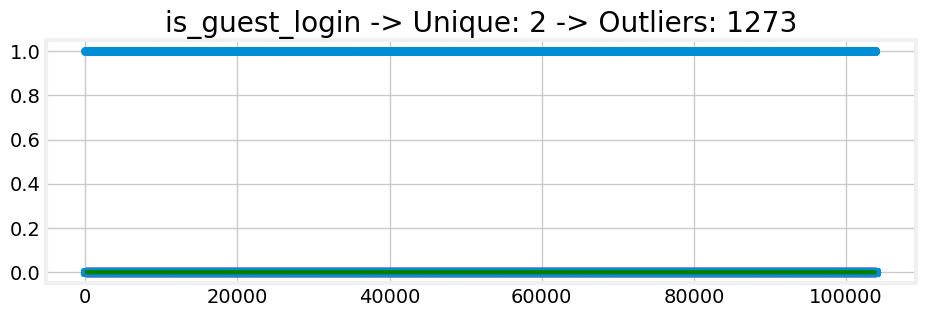

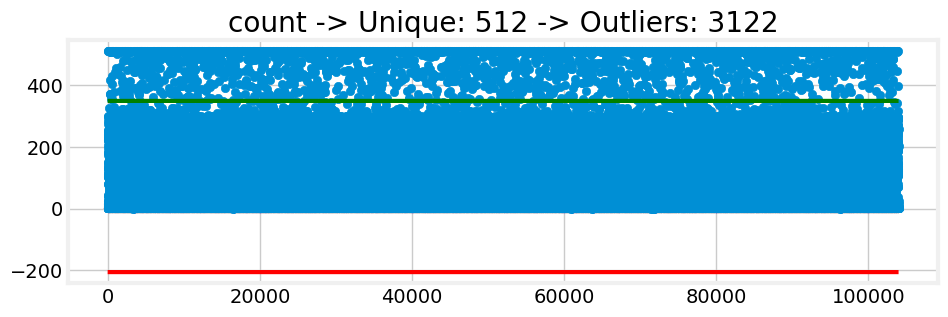

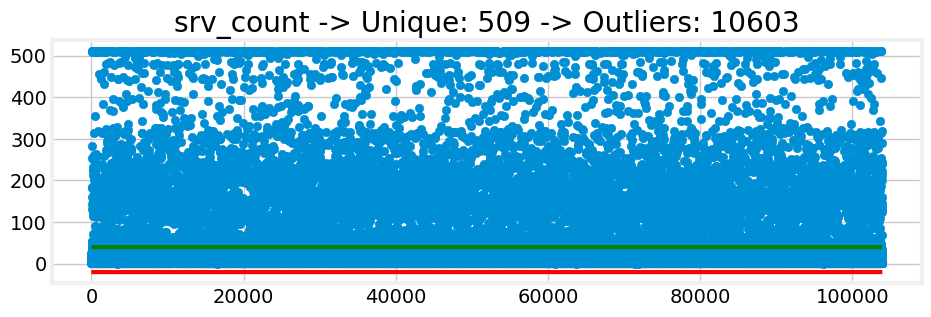

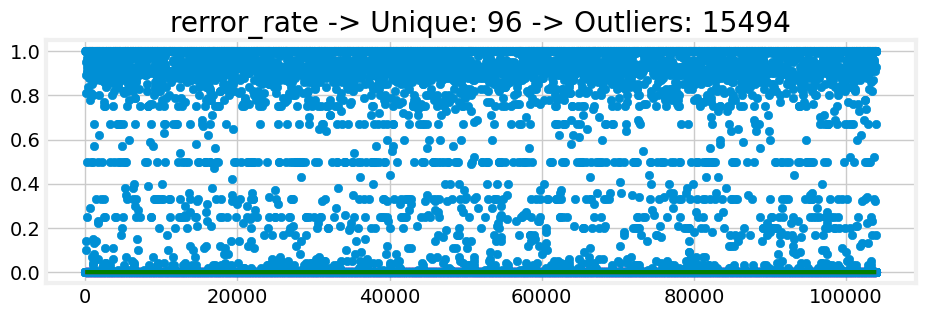

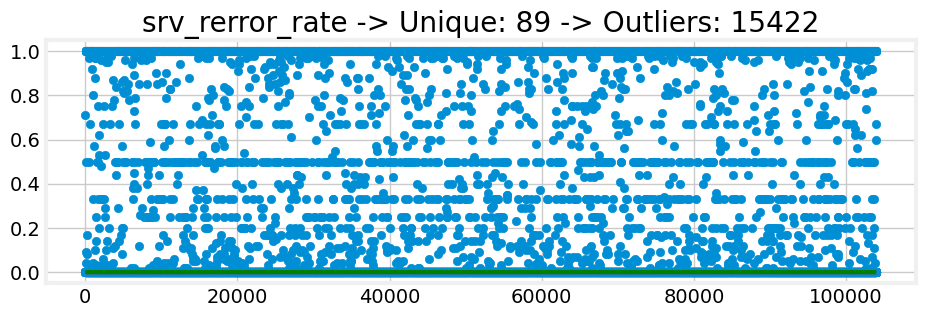

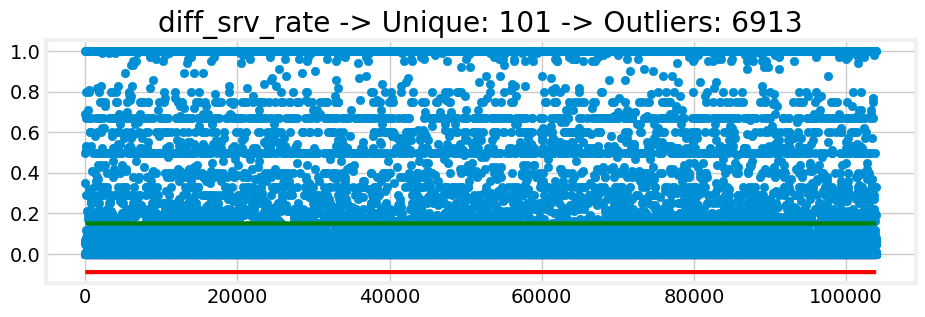

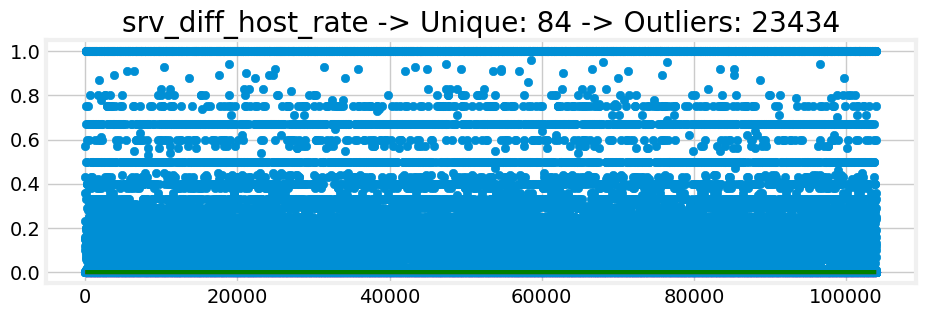

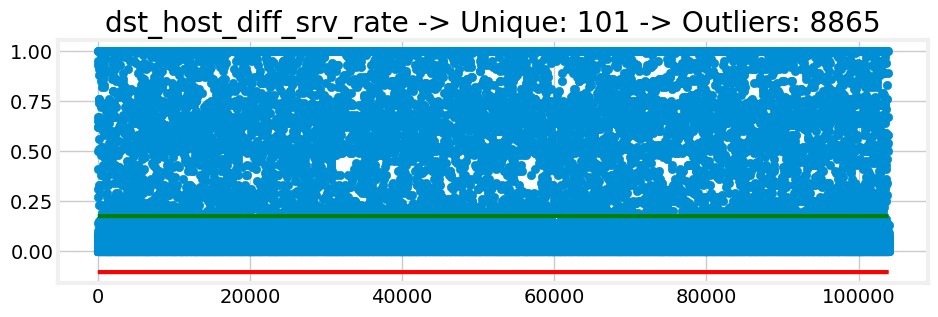

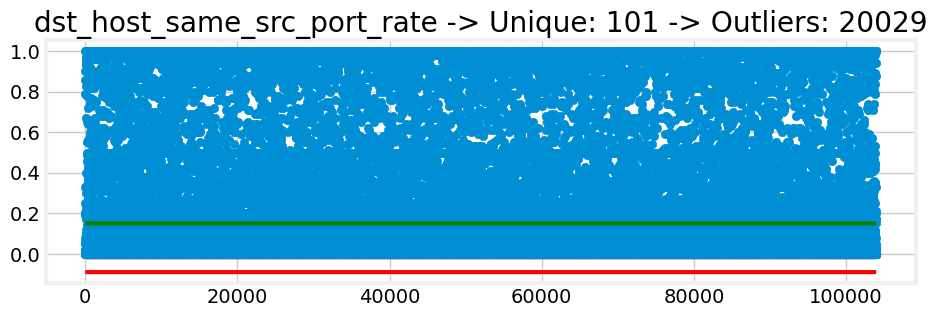

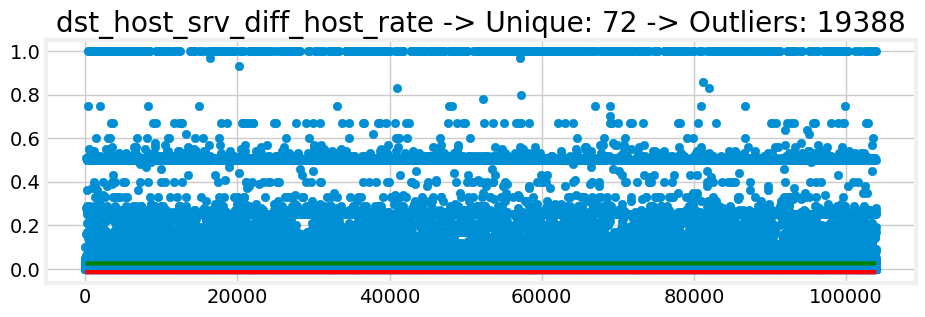

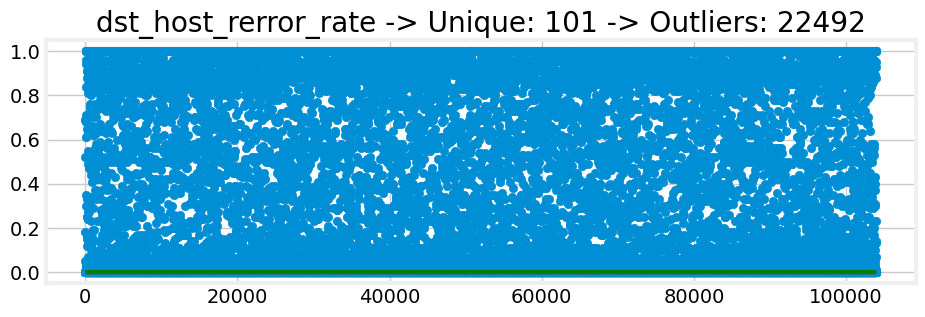

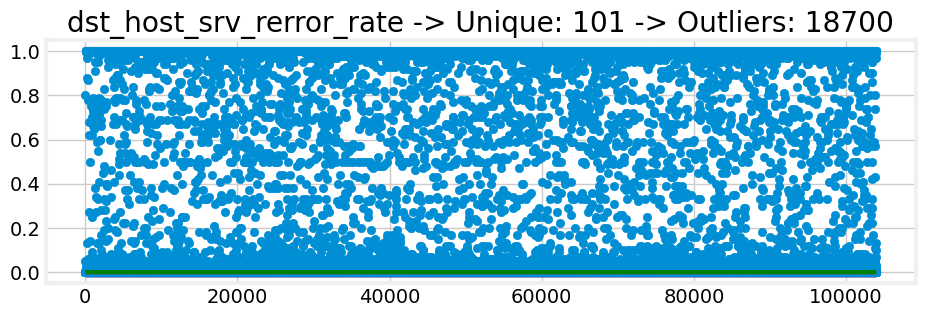

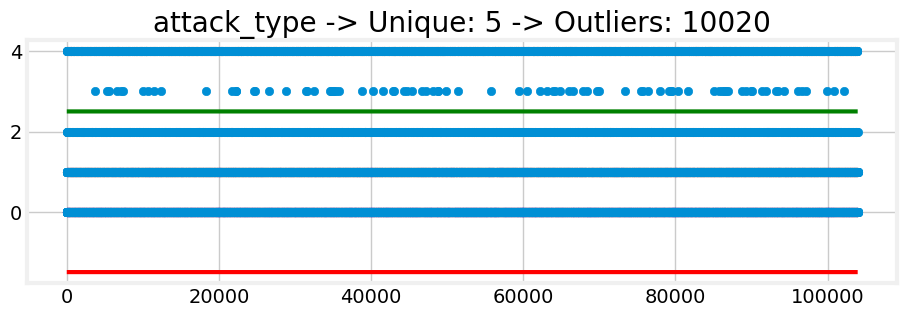

In [9]:
# 4. Verificar outliers -> Interquartile Range (IQR) Method
def check_outliers(coluna, df):
    try:
        q1 = df[coluna].quantile(0.25)
        q3 = df[coluna].quantile(0.75)
        IQR = q3-q1

        outliers = df[coluna][((df[coluna]<(q1-1.5*IQR)) | (df[coluna]>(q3+1.5*IQR)))]
        return outliers
    except TypeError:
        return []
    
def plot_column(coluna, outliers):
    x = df.index
    y = df[col].values
    
    q1 = df[coluna].quantile(0.25)
    q3 = df[coluna].quantile(0.75)
    IQR = q3-q1
    y_q1 = np.ones(len(df)) * (q1 - 1.5 * IQR)
    y_q3 = np.ones(len(df)) * (q3 + 1.5 * IQR)

    plt.figure()
    plt.title(col + " -> Unique: " + str(len(df[col].unique())) +  " -> Outliers: " + str(len(outliers)))
    plt.scatter(x, y)
    plt.plot(x, y_q1, "r")
    plt.plot(x, y_q3, "g")



for col in df.columns:
    outliers = check_outliers(col, df)
    if len(outliers) > 0:
        #print(col, len(outliers) )
        plot_column(col, outliers)

Resultados dos graficos:

<li> duration, land, wrong_fragment, urgent, hot, num_failed_logins, root_shell, su_attempted, num_shells, is_host_login, is_guest_login: apresentam poucos unique values, se removidos ficamos com uma coluna com apenas um valor
<li> src_bytes, dst_bytes, count, srv_count, serror_rate, srv_rerror_rate, diff_srv_rate, srv_diff_host_rate, dst_host_diff_srv_rate, dst_host_same_src_port_rate, dst_host_srv_diff_host_rate, dst_host_rerror_rate, dst_host_srv_rerror_rate: Demasiado outliers para serem todos eliminados
<li> num_compromised, num_root: apresenta alguns/poucos outliers muito acima da media. Mas se removermos todos ficamos com uma coluna com apenas um valor
<li> num_file_creations, num_access_files: keep / don´t change

Resolver Outliers

O objetivo é criar diferentes datasets. Para o nosso caso vamos criar 4 diferentes datasets:
<li> 1º: sem remover os outliers
<li> 2º: remover todos os outliers
<li> 3ª: remover alguns outliers (os que nao contêm unique values)
<li> 4ª: transformar outliers (passar de outliers para Q3 * 1.5 com unique values > 10) 

In [10]:
datasets = []
#=================================================================
# Dataset 1
print("DF 1")
df_1 = df.copy()
datasets.append(df_1)

#=================================================================
# Dataset 2
print("DF 2")
df_2 = df.copy()

for col in df_2.columns:
    if col != "attack_type":
        outliers = check_outliers(col, df_2)
        #print(outliers.index)
        if len(outliers) > 0:
            print(len(df_2), end= " -> ")
            df_2 = df_2.drop( outliers.index, axis = 0)
            print(len(df_2))
            df_2 = df_2.reset_index(drop= True)
datasets.append(df_2)

#=================================================================
# Dataset 3
print("DF 3")
df_3 = df.copy()

for col in df_3.columns:
    if col != "attack_type":
        outliers = check_outliers(col, df_3)
        #print(outliers.index)
        if len(outliers) > 0:
            if len(df_3[col].unique()) > 10:
                print(len(df_3), end= " -> ")
                df_3 = df_3.drop( outliers.index, axis = 0)
                print(len(df_3))
                df_3 = df_3.reset_index(drop= True)
datasets.append(df_3)

#=================================================================
# Dataset 4
print("DF 4")
df_4 = df.copy()

for col in df_4.columns:
    if col != "attack_type":
        outliers = check_outliers(col, df_4)
        #print(outliers.index)
        if len(outliers) > 0:
            if len(df[col].unique()) > 10:
                print(len(df_4), end= " -> ")
                
                q1 = df_4[col].quantile(0.25)
                q3 = df_4[col].quantile(0.75)
                IQR = q3-q1
                y_q1 =  (q1 - 1.5 * IQR)
                y_q3 =  (q3 + 1.5 * IQR)

                for ind in outliers.index:
                    val = outliers[ind]
                    if val <= y_q1:
                        df_4.at[ind, col] = y_q1
                    else:
                        df_4.at[ind, col] = y_q3
                
                print(len(df_4))
                df_4 = df_4.reset_index(drop= True)
datasets.append(df_4)

DF 1
DF 2
103961 -> 94592
94592 -> 77067
77067 -> 63957
63957 -> 54489
54489 -> 49535
49535 -> 43322
43322 -> 43198
43198 -> 42895
42895 -> 42888
42888 -> 42587
42587 -> 42578
42578 -> 42577
42577 -> 42412
42412 -> 42411
42411 -> 42299
42299 -> 40853
40853 -> 39484
39484 -> 39225
39225 -> 38389
38389 -> 29528
29528 -> 29164
29164 -> 23434
23434 -> 19094
19094 -> 18699
18699 -> 18693
DF 3
103961 -> 94592
94592 -> 89996
89996 -> 82536
82536 -> 69249
69249 -> 68025
68025 -> 60475
60475 -> 49109
49109 -> 48917
48917 -> 46453
46453 -> 36345
36345 -> 31907
31907 -> 30820
30820 -> 23505
23505 -> 23080
23080 -> 18909
DF 4
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961
103961 -> 103961


In [11]:
for df_aux in datasets:
    display(df_aux.describe())

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,103961.000000,103961.000000,103961.000000,103961.000000,1.039610e+05,1.039610e+05,103961.000000,103961.000000,103961.000000,103961.000000,...,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000
mean,275.173796,0.244544,9.729716,0.751743,3.973167e+04,2.306635e+04,0.000164,0.020460,0.000173,0.187561,...,119.597243,0.535200,0.084182,0.146056,0.030645,0.255452,0.250485,0.137248,0.137525,0.795154
std,2447.626055,0.557487,12.669477,1.275256,5.776657e+06,4.426298e+06,0.012787,0.239667,0.017544,1.993322,...,111.244045,0.448242,0.194313,0.308700,0.108958,0.428060,0.429276,0.323793,0.336550,1.168794
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,3.000000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,14.000000,1.000000,2.790000e+02,5.800000e+02,0.000000,0.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.010000,0.550000,0.490000,0.000000,0.000000,1.000000
max,54451.000000,2.000000,68.000000,10.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,18693.0,18693.0,18693.000000,18693.000000,18693.000000,18693.000000,18693.0,18693.0,18693.0,18693.0,...,18693.000000,18693.000000,18693.000000,18693.000000,18693.0,18693.000000,18693.000000,18693.0,18693.0,18693.000000
mean,0.0,0.0,4.457604,0.756754,66.058685,351.925480,0.0,0.0,0.0,0.0,...,70.184722,0.281853,0.050450,0.000926,0.0,0.757076,0.756355,0.0,0.0,0.758038
std,0.0,0.0,4.008522,0.429054,122.661770,859.126184,0.0,0.0,0.0,0.0,...,101.299891,0.401144,0.030707,0.003383,0.0,0.428233,0.429002,0.0,0.0,0.431519
min,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,2.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,8.000000,0.030000,0.020000,0.000000,0.0,0.980000,1.000000,0.0,0.0,1.000000
50%,0.0,0.0,3.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,16.000000,0.060000,0.060000,0.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000
75%,0.0,0.0,3.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,64.000000,0.260000,0.070000,0.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000
max,0.0,0.0,19.000000,1.000000,764.000000,5320.000000,0.0,0.0,0.0,0.0,...,255.000000,1.000000,0.170000,0.020000,0.0,1.000000,1.000000,0.0,0.0,4.000000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,18909.0,18909.0,18909.000000,18909.000000,18909.000000,18909.0,18909.0,18909.0,18909.0,18909.0,...,18909.000000,18909.000000,18909.000000,18909.0,18909.0,18909.0,18909.000000,18909.0,18909.0,18909.000000
mean,0.0,0.0,13.396372,0.999947,0.003755,0.0,0.0,0.0,0.0,0.0,...,12.089375,0.047232,0.066206,0.0,0.0,1.0,0.999947,0.0,0.0,1.000106
std,0.0,0.0,13.012809,0.007272,0.516326,0.0,0.0,0.0,0.0,0.0,...,9.084782,0.035657,0.012110,0.0,0.0,0.0,0.007272,0.0,0.0,0.022997
min,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.000000,0.010000,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000
25%,0.0,0.0,3.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,5.000000,0.020000,0.060000,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000
50%,0.0,0.0,4.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,11.000000,0.040000,0.070000,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000
75%,0.0,0.0,24.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,17.000000,0.070000,0.070000,0.0,0.0,1.0,1.000000,0.0,0.0,1.000000
max,0.0,0.0,42.000000,1.000000,71.000000,0.0,0.0,0.0,0.0,0.0,...,85.000000,0.330000,0.140000,0.0,0.0,1.0,1.000000,0.0,0.0,4.000000


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
count,103961.0,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.0,...,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.000000,103961.0,103961.0,103961.000000
mean,0.0,0.244544,8.727138,0.610128,173.010557,377.171035,0.000164,0.020460,0.000173,0.0,...,119.597243,0.535200,0.043251,0.038698,0.006484,0.255452,0.250485,0.0,0.0,0.795154
std,0.0,0.557487,9.889237,0.874974,225.801022,564.339143,0.012787,0.239667,0.017544,0.0,...,111.244045,0.448242,0.051978,0.059191,0.010266,0.428060,0.429276,0.0,0.0,1.168794
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
50%,0.0,0.000000,3.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
75%,0.0,0.000000,14.000000,1.000000,279.000000,580.000000,0.000000,0.000000,0.000000,0.0,...,255.000000,1.000000,0.070000,0.060000,0.010000,0.550000,0.490000,0.0,0.0,1.000000
max,0.0,2.000000,32.000000,2.500000,697.500000,1450.000000,1.000000,3.000000,3.000000,0.0,...,255.000000,1.000000,0.175000,0.150000,0.025000,1.000000,1.000000,0.0,0.0,4.000000


In [12]:
# 4. Verificar unique values
# Procuramos colunas com apenas um valor
i = 0
for j in range(len(datasets)):
    i += 1
    print("DF ", i, " -> ", len(datasets[j].columns), end= " -> ")
    colunas = []
 
    num = 0
    for col in datasets[j].columns:
        if col != "attack_type":
            if len(datasets[j][col].unique()) == 1:
                num += 1
                colunas.append(col)
    datasets[j] = datasets[j].drop(columns = colunas )
    print(len(datasets[j].columns))

DF  1  ->  42 -> 41
DF  2  ->  42 -> 19
DF  3  ->  42 -> 16
DF  4  ->  42 -> 31


In [13]:
for df_aux in datasets:
    print(len(df_aux.columns))

41
19
16
31


In [14]:
for df_aux in datasets:
    try:
        print(df_aux["attack_type"].unique())
    except KeyError:
        print()

[1 0 4 2 3]
[1 0 2 4]
[1 0 4]
[1 0 4 2 3]


Dos 4 dataframes criados apenas 2 apresentam todos os unique values do target (o dataframe inicial e o dataframe 4 em que substituimos os outliers pelo quartil) 

In [15]:
df1 = datasets[0]
df2 = datasets[3]
datasets = [df1, df2]

In [16]:
plt.rcParams["figure.figsize"] = (19,8)
for df_aux in datasets:
    plt.figure()
    sns.heatmap(df_aux.corr(), annot=True, fmt=".2f")

Output hidden; open in https://colab.research.google.com to view.

Temos muitas colunas e algumas delas sem correlação com o nosso target. Vamos entao criar mais dois dataframes, estes dois sem essas colunas.

In [17]:
df1 = datasets[0]
df2 = datasets[1]
datasets.append(df1)
datasets.append(df2)

In [18]:
for df_aux in datasets:
    print(len(df_aux.columns))

41
31
41
31


In [19]:
for j in range(len(datasets)):
    print("DF")
    if j > 1:
        for col in datasets[j].columns:
            try:
                corr = datasets[j]["attack_type"].corr(datasets[j][str(col)])
                if abs(corr) <= 0.01:
                    print(col , " -> ", corr)
                    datasets[j] = datasets[j].drop(columns = col )
            except TypeError:
                pass

DF
DF
DF
land  ->  -0.0003331567782185252
hot  ->  -0.001315860196184654
num_compromised  ->  -0.006350981524790041
root_shell  ->  0.002719793875868609
num_root  ->  -0.006931544009963877
num_shells  ->  0.004938794261216679
DF
land  ->  -0.0003331567782185252
root_shell  ->  0.002719793875868609
num_shells  ->  0.004938794261216679


In [20]:
for df_aux in datasets:
    print(len(df_aux.columns))

41
31
35
28


In [21]:
datasets[0].to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_NoCorr_NoPCA.csv", index = False)
datasets[1].to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/NoOutliers_NoCorr_NoPCA.csv", index = False)
datasets[2].to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_Corr_NoPCA.csv", index = False)
datasets[3].to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/NoOutliersl_Corr_NoPCA.csv", index = False)

Como temos 4 dataframes com muitas features temos de diminuir a dimensionalidade. Para isso vamos usar o Principal Component Analysis.

In [22]:
num_components = 2

df1 = datasets[0]
pca = PCA(n_components= num_components)
colunas = df1.columns.to_list()
colunas.remove("attack_type")

pca.fit(df1[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df1)

df1_pca = pca.transform(df1[colunas])

print(np.shape(df1_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df1_pca[:,i]
df_dict["Target"] = df_1["attack_type"]

df_1 = pd.DataFrame( df_dict)
df_1.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_NoCorr_PCA.csv", index = False)
df_1

[0.6300713  0.36992859]
0.9999998869168936
[1.86255764e+09 1.42716379e+09]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,1,0,0,0,2599,293,0,0,0,0,...,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,1
1,0,0,1,1,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,1
2,0,0,2,0,280,13254,0,0,0,0,...,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,0
3,0,0,2,0,230,1582,0,0,0,0,...,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,0
4,0,0,2,0,218,483,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,0,19,2,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,1
103957,0,0,4,1,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,1
103958,0,0,0,0,0,83,0,0,0,0,...,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0
103959,50,0,4,0,226,2615,0,0,0,1,...,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,2


(103961, 2)


,PCA_1,PCA_2,Target
0,-37132.514606,-22773.620196,1
1,-39731.512556,-23066.638720,1
2,-39451.606889,-9812.636765,0
3,-39501.523810,-21484.637118,0
4,-39513.516013,-22583.637188,0
...,...,...,...
103956,-39731.512569,-23066.638732,1
103957,-39731.512546,-23066.638710,1
103958,-39731.513148,-22983.638722,0
103959,-39505.529545,-20451.635971,2


In [23]:
num_components = 5
df_2 = datasets[1]
pca = PCA(n_components= num_components)
colunas = df_2.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_2[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df2)

df2_pca = pca.transform(df_2[colunas])

print(np.shape(df2_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df2_pca[:,i]
df_dict["Target"] = df_2["attack_type"]

df2 = pd.DataFrame( df_dict)
df2.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/NoOutliers_NoCorr_PCA.csv", index = False)
df2

[0.83328081 0.10637974 0.02909502 0.01802302 0.01278601]
0.9995646099447024
[186799.40850686  66743.54505884  34905.12031263  27472.21201153
  23139.14853023]


,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_type
0,0,0,0.0,697.5,293,0,0,0,0,1,...,0.00,255,74,0.29,0.14,0.00,0.000,0.0,0.0,1
1,0,1,1.0,0.0,0,0,0,0,0,0,...,0.06,255,18,0.07,0.07,0.00,0.000,1.0,1.0,1
2,0,2,0.0,280.0,1450,0,0,0,0,1,...,0.00,12,254,1.00,0.00,0.08,0.025,0.0,0.0,0
3,0,2,0.0,230.0,1450,0,0,0,0,1,...,0.00,21,255,1.00,0.00,0.05,0.020,0.0,0.0,0
4,0,2,0.0,218.0,483,0,0,0,0,1,...,0.00,255,255,1.00,0.00,0.00,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,19,2.0,0.0,0,0,0,0,0,0,...,0.07,255,4,0.02,0.09,0.00,0.000,0.0,0.0,1
103957,0,4,1.0,0.0,0,0,0,0,0,0,...,0.08,255,4,0.02,0.07,0.01,0.000,1.0,1.0,1
103958,0,0,0.0,0.0,83,0,0,0,0,1,...,0.00,255,124,0.49,0.03,0.00,0.000,0.0,0.0,0
103959,0,4,0.0,226.0,1450,0,0,0,0,1,...,0.00,255,2,0.01,0.02,0.00,0.000,0.0,0.0,2


(103961, 5)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,Target
0,7.329904,524.795434,81.499153,34.896902,-110.340993,1
1,-416.160038,-108.762534,28.651593,26.425293,-46.069958,1
2,1093.320861,-79.453927,-64.621961,35.686549,86.483415,0
3,1083.580649,-129.158033,-62.706940,27.837278,85.709017,0
4,128.391612,33.324495,-14.197386,-141.077554,-56.458698,0
...,...,...,...,...,...,...
103956,-430.446910,-124.554472,130.964444,39.207180,54.794826,1
103957,-410.231847,-100.773856,-28.062672,39.271490,-113.830044,1
103958,-313.060597,-106.564017,-66.617313,-63.575212,-99.470626,0
103959,1039.542046,-166.018430,145.069164,169.732613,-144.505328,2


In [24]:
num_components = 2
df_3 = datasets[2]
pca = PCA(n_components= num_components)
colunas = df_3.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_3[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df_3)

df3_pca = pca.transform(df_3[colunas])

print(np.shape(df3_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df3_pca[:,i]
df_dict["Target"] = df_3["attack_type"]


df_3 = pd.DataFrame( df_dict )
df_3.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_Corr_PCA.csv", index = False)
df_3

[0.6300713  0.36992859]
0.9999998869419973
[1.86255764e+09 1.42716379e+09]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,1,0,0,0,2599,293,0,0,0,1,...,74,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,1
1,0,0,1,1,0,0,0,0,0,0,...,18,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,1
2,0,0,2,0,280,13254,0,0,0,1,...,254,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,0
3,0,0,2,0,230,1582,0,0,0,1,...,255,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,0
4,0,0,2,0,218,483,0,0,0,1,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,0,19,2,0,0,0,0,0,0,...,4,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,1
103957,0,0,4,1,0,0,0,0,0,0,...,4,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,1
103958,0,0,0,0,0,83,0,0,0,1,...,124,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0
103959,50,0,4,0,226,2615,0,0,0,1,...,2,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,2


(103961, 2)


,PCA_1,PCA_2,Target
0,-37132.514606,-22773.620196,1
1,-39731.512556,-23066.638720,1
2,-39451.606889,-9812.636765,0
3,-39501.523810,-21484.637118,0
4,-39513.516013,-22583.637188,0
...,...,...,...
103956,-39731.512569,-23066.638732,1
103957,-39731.512546,-23066.638710,1
103958,-39731.513148,-22983.638722,0
103959,-39505.529545,-20451.635971,2


In [25]:
num_components = 5
df_4 = datasets[3]
pca = PCA(n_components= num_components)
colunas = df_4.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_4[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df_4)

df4_pca = pca.transform(df_4[colunas])

print(np.shape(df4_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df4_pca[:,i]
df_dict["Target"] = df_4["attack_type"]

df_4 = pd.DataFrame( df_dict )
df_4.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/NoOutliersl_Corr_PCA.csv", index = False)
df_4

[0.83328082 0.10637974 0.02909502 0.01802302 0.01278601]
0.9995646154798177
[186799.40850473  66743.54505809  34905.12031136  27472.21199646
  23139.14852942]


,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,logged_in,su_attempted,...,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_type
0,0,0,0.0,697.5,293,0,0,0,1,0,...,0.00,255,74,0.29,0.14,0.00,0.000,0.0,0.0,1
1,0,1,1.0,0.0,0,0,0,0,0,0,...,0.06,255,18,0.07,0.07,0.00,0.000,1.0,1.0,1
2,0,2,0.0,280.0,1450,0,0,0,1,0,...,0.00,12,254,1.00,0.00,0.08,0.025,0.0,0.0,0
3,0,2,0.0,230.0,1450,0,0,0,1,0,...,0.00,21,255,1.00,0.00,0.05,0.020,0.0,0.0,0
4,0,2,0.0,218.0,483,0,0,0,1,0,...,0.00,255,255,1.00,0.00,0.00,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,19,2.0,0.0,0,0,0,0,0,0,...,0.07,255,4,0.02,0.09,0.00,0.000,0.0,0.0,1
103957,0,4,1.0,0.0,0,0,0,0,0,0,...,0.08,255,4,0.02,0.07,0.01,0.000,1.0,1.0,1
103958,0,0,0.0,0.0,83,0,0,0,1,0,...,0.00,255,124,0.49,0.03,0.00,0.000,0.0,0.0,0
103959,0,4,0.0,226.0,1450,0,0,0,1,0,...,0.00,255,2,0.01,0.02,0.00,0.000,0.0,0.0,2


(103961, 5)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,Target
0,7.329904,524.795434,81.499153,34.896902,-110.340993,1
1,-416.160038,-108.762534,28.651593,26.425293,-46.069958,1
2,1093.320861,-79.453927,-64.621961,35.686549,86.483415,0
3,1083.580649,-129.158033,-62.706940,27.837278,85.709017,0
4,128.391612,33.324495,-14.197386,-141.077554,-56.458698,0
...,...,...,...,...,...,...
103956,-430.446910,-124.554472,130.964444,39.207180,54.794826,1
103957,-410.231847,-100.773856,-28.062672,39.271490,-113.830044,1
103958,-313.060597,-106.564017,-66.617313,-63.575212,-99.470626,0
103959,1039.542040,-166.018437,145.069155,169.732573,-144.505316,2


Temos 4 datasets, nos 2 com outliers vamos fazer standardization dos valores nao unicos, nos outros dois vamos fazer

In [26]:
colunas_normalizar = ["duration", "src_bytes", "dst_bytes", "hot", "num_compromised", "num_root", "num_file_creations", 
                      "count", "srv_count", "dst_host_count", "dst_host_srv_count"]

for i in range(len(datasets)):
    for col in colunas_normalizar:
        if col in datasets[i].columns:
            if i == 0 or i == 2:
                datasets[i][col] = (datasets[i][col] - datasets[i][col].mean()) / datasets[i][col].std()
            else:
                datasets[i][col] = (datasets[i][col] - datasets[i][col].min()) / (datasets[i][col].max()- datasets[i][col].min())

In [27]:
num_components = 30
df_1 = datasets[0]
print(len(datasets[0].columns))
pca = PCA(n_components=num_components)
colunas = df_1.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_1[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df_1)

df1_pca = pca.transform(df_1[colunas])

print(np.shape(df1_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df1_pca[:,i]
df_dict["Target"] = df_1["attack_type"]

df_1 = pd.DataFrame( df_dict)
df_1.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_NoCorr_PCA_St.csv", index = False)
df_1

41
[9.16683090e-01 1.57895755e-02 1.14227442e-02 9.74140461e-03
 7.20205380e-03 6.14175980e-03 5.69502798e-03 5.67649038e-03
 5.60682254e-03 4.71536513e-03 3.91163956e-03 2.42931677e-03
 1.72248207e-03 9.23009338e-04 4.95749023e-04 3.37987570e-04
 3.04558127e-04 2.29655800e-04 2.15312244e-04 1.72244502e-04
 1.12895768e-04 1.00534413e-04 7.05416046e-05 5.39602872e-05
 4.09173055e-05 3.71094119e-05 3.30269549e-05 3.13642773e-05
 2.60580255e-05 2.50732916e-05]
0.9999477703961019
[4090.9509212   536.90801369  456.66726784  421.72121616  362.61255739
  334.85830367  322.45015522  321.9249318   319.94333296  293.40825138
  267.23545337  210.59920783  177.33400153  129.81285652   95.13615452
   78.55340656   74.56752969   64.75202703   62.69732663   56.07733199
   45.39975308   42.8422265    35.88701419   31.38714296   27.33179611
   26.02895277   24.55550815   23.92942712   21.81149388   21.39539631]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,-0.112016,0,0,0,-0.006428,-0.005145,0,0,0,-0.094095,...,-0.409885,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,1
1,-0.112425,0,1,1,-0.006878,-0.005211,0,0,0,-0.094095,...,-0.913283,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,1
2,-0.112425,0,2,0,-0.006829,-0.002217,0,0,0,-0.094095,...,1.208179,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,0
3,-0.112425,0,2,0,-0.006838,-0.004854,0,0,0,-0.094095,...,1.217169,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,0
4,-0.112425,0,2,0,-0.006840,-0.005102,0,0,0,-0.094095,...,1.217169,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,-0.112425,0,19,2,-0.006878,-0.005211,0,0,0,-0.094095,...,-1.039132,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,1
103957,-0.112425,0,4,1,-0.006878,-0.005211,0,0,0,-0.094095,...,-1.039132,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,1
103958,-0.112425,0,0,0,-0.006878,-0.005192,0,0,0,-0.094095,...,0.039577,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0
103959,-0.091997,0,4,0,-0.006839,-0.004620,0,0,0,0.407581,...,-1.057110,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,2


(103961, 30)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_22,PCA_23,PCA_24,PCA_25,PCA_26,PCA_27,PCA_28,PCA_29,PCA_30,Target
0,-9.740907,-0.056039,-0.016508,-0.067691,-0.660635,0.220843,0.027562,0.156049,0.088685,-0.359855,...,-0.009465,-0.358890,0.008710,-0.261389,-0.013822,0.035918,-0.178749,0.018638,0.113617,1
1,-8.619751,1.775560,-0.111788,0.628174,-1.516490,0.286223,0.027577,0.421339,0.287999,-0.290343,...,0.029452,-0.034118,0.001740,0.064957,0.006010,0.011111,0.019835,-0.003953,-0.004637,1
2,-7.840027,-1.718236,0.064405,-0.760077,0.219265,-0.368063,-0.001359,0.010670,0.116027,0.348239,...,0.083467,0.031719,0.003968,0.002295,-0.010420,0.004651,-0.001443,0.001525,0.006059,0
3,-7.837283,-1.697754,0.050847,-0.601923,0.292478,-0.351706,-0.005603,-0.005115,0.096624,0.338967,...,0.093059,0.017493,0.004357,0.011808,-0.026425,0.002572,0.005345,0.002215,0.005309,0
4,-7.798537,-1.018934,-0.036614,0.155793,-0.028014,0.021112,0.024695,0.105409,0.111930,-0.291522,...,-0.062278,-0.018137,0.010549,0.021634,0.019444,-0.003675,0.000026,0.000384,-0.005229,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,9.362774,2.109906,-0.054945,0.015970,0.493562,-0.450539,-0.026926,-0.355551,-0.250091,0.612321,...,0.079413,-0.005838,0.000691,-0.013761,-0.004799,-0.022796,0.001835,0.015611,-0.049854,1
103957,-5.638547,1.449411,-0.061357,0.155078,-1.532561,0.293839,0.034815,0.430304,0.313643,-0.392134,...,-0.008964,-0.027796,0.002603,0.041770,-0.002009,0.002684,0.010302,0.002468,-0.003530,1
103958,-9.757785,-0.363745,-0.019828,-0.026509,-0.586760,0.196405,0.028432,0.181215,0.121979,-0.384375,...,-0.020040,0.059289,0.017643,-0.045274,0.031365,-0.029697,-0.042515,0.018859,-0.020586,0
103959,-5.727692,0.005555,0.231148,-0.276208,-0.811559,2.000166,-0.064760,-0.471464,0.806546,0.517215,...,0.014914,0.134362,-1.075369,-0.085308,0.045104,-0.076320,-0.106314,0.068243,-0.045281,2


In [28]:
num_components = 15

df_2 = datasets[1]
print(len(datasets[1].columns))
pca = PCA(n_components= num_components)
colunas = df_2.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_2[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df_2)

df2_pca = pca.transform(df_2[colunas])

print(np.shape(df2_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df2_pca[:,i]
df_dict["Target"] = df_2["attack_type"]

df2 = pd.DataFrame( df_dict )
df2.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/NoOutliers_NoCorr_PCA_St.csv", index = False)
df2

31
[9.70073275e-01 1.39581964e-02 5.32009131e-03 3.88505000e-03
 1.66531676e-03 1.36896059e-03 6.93071311e-04 6.33546118e-04
 5.87725583e-04 4.95575347e-04 3.63964637e-04 2.44403297e-04
 1.71973482e-04 1.18876160e-04 1.06120336e-04]
0.9996861462079369
[3193.46983585  383.06740615  236.49398076  202.09652889  132.31496761
  119.96540396   85.35903746   81.61118153   78.60457899   72.17975357
   61.8571837    50.68904143   42.51980762   35.35150696   33.40102984]


,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,num_failed_logins,logged_in,...,diff_srv_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,attack_type
0,0,0,0.0,1.000000,0.202069,0,0,0,0,1,...,0.00,1.000000,0.290196,0.29,0.14,0.00,0.000,0.0,0.0,1
1,0,1,1.0,0.000000,0.000000,0,0,0,0,0,...,0.06,1.000000,0.070588,0.07,0.07,0.00,0.000,1.0,1.0,1
2,0,2,0.0,0.401434,1.000000,0,0,0,0,1,...,0.00,0.047059,0.996078,1.00,0.00,0.08,0.025,0.0,0.0,0
3,0,2,0.0,0.329749,1.000000,0,0,0,0,1,...,0.00,0.082353,1.000000,1.00,0.00,0.05,0.020,0.0,0.0,0
4,0,2,0.0,0.312545,0.333103,0,0,0,0,1,...,0.00,1.000000,1.000000,1.00,0.00,0.00,0.000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,0,19,2.0,0.000000,0.000000,0,0,0,0,0,...,0.07,1.000000,0.015686,0.02,0.09,0.00,0.000,0.0,0.0,1
103957,0,4,1.0,0.000000,0.000000,0,0,0,0,0,...,0.08,1.000000,0.015686,0.02,0.07,0.01,0.000,1.0,1.0,1
103958,0,0,0.0,0.000000,0.057241,0,0,0,0,1,...,0.00,1.000000,0.486275,0.49,0.03,0.00,0.000,0.0,0.0,0
103959,0,4,0.0,0.324014,1.000000,0,0,0,0,1,...,0.00,1.000000,0.007843,0.01,0.02,0.00,0.000,0.0,0.0,2


(103961, 15)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,PCA_11,PCA_12,PCA_13,PCA_14,PCA_15,Target
0,-8.762635,-0.336345,-0.149760,-0.173730,-0.784294,-0.594855,0.230025,-0.421734,0.009711,0.098067,-0.024115,-0.053686,-0.029037,-0.023491,0.061494,1
1,-7.628653,2.035548,-0.919512,0.317436,-0.054352,0.128832,-0.139235,0.000331,-0.138780,0.047368,0.076142,-0.062134,0.080817,0.018664,-0.028744,1
2,-6.800156,-1.013453,-0.098129,-0.603688,0.159491,0.366500,0.108099,0.359175,0.033354,0.014451,-0.033018,0.075868,0.058869,-0.119366,0.001560,0
3,-6.797544,-1.018155,-0.113031,-0.525155,0.335377,0.288448,0.153374,0.403029,0.163881,-0.060083,-0.222296,-0.015660,0.091828,-0.113927,-0.000854,0
4,-6.780040,-0.772119,-0.132461,-0.240304,0.322681,-0.395269,-0.173032,-0.237973,0.017894,-0.160649,0.021257,-0.209463,-0.076027,0.056304,0.004735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,10.312797,0.873438,1.325815,-0.216720,-0.170946,-0.436010,0.050430,0.314835,-0.087348,-0.248224,0.176494,0.090356,-0.025609,0.023444,0.012099,1
103957,-4.636328,1.849930,-0.879866,0.206104,-0.137425,0.192481,-0.241710,-0.140435,-0.077904,0.162258,-0.067853,-0.125250,0.149161,0.002666,-0.020125,1
103958,-8.754346,-0.291204,-0.117993,-0.080852,-0.396254,-0.360812,-0.483406,-0.197392,-0.055055,-0.255700,-0.029928,-0.310348,-0.388072,-0.006365,0.068361,0
103959,-4.764497,-0.407675,-0.149438,-0.468037,-0.827950,-0.575695,-0.200952,0.379066,-0.032922,0.446169,-0.485477,0.014678,-0.226240,0.046122,0.717470,2


In [29]:
num_components = 25
df_3 = datasets[2]
print(len(datasets[2].columns))
pca = PCA(n_components=num_components)
colunas = df_3.columns.to_list()
colunas.remove("attack_type")

pca.fit(df_3[colunas])
print(pca.explained_variance_ratio_)
print(np.sum(pca.explained_variance_ratio_))
print(pca.singular_values_)
display(df_3)

df3_pca = pca.transform(df_3[colunas])

print(np.shape(df3_pca))

df_dict = {}
for i in range(num_components):
    df_dict["PCA_" + str(i+1)] = df3_pca[:,i]
df_dict["Target"] = df_3["attack_type"]

df_3 = pd.DataFrame( df_dict )
df_3.to_csv("/drive/MyDrive/ACA/Projeto/dataset/New_Datasets/Outliers_Corr_PCA_St.csv", index = False)
df_3

35
[9.32626604e-01 1.60504709e-02 9.89840571e-03 7.29356186e-03
 6.14164816e-03 5.79385244e-03 5.76445464e-03 4.80453147e-03
 3.98179424e-03 2.50309832e-03 1.75961701e-03 9.75593857e-04
 5.09658963e-04 3.43866848e-04 3.09879800e-04 2.34185068e-04
 2.20474111e-04 1.75249357e-04 1.15588690e-04 1.02366599e-04
 7.19057575e-05 6.39573472e-05 5.57948016e-05 4.00617619e-05
 3.77460366e-05]
0.9998743680506956
[4090.95032168  536.67849714  421.45666958  361.77632347  331.98065088
  322.44379253  321.62471816  293.62689118  267.30661877  211.93820893
  177.69670776  132.31370613   95.63351947   78.55348548   74.57048013
   64.82610158   62.89977699   56.07877555   45.54366503   42.85973123
   35.92130769   33.87782551   31.64223667   26.81237768   26.02591361]


,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,urgent,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type
0,-0.112016,0,0,0,-0.006428,-0.005145,0,0,0,1,...,-0.409885,0.29,0.14,0.00,0.00,0.0,0.0,0.69,0.0,1
1,-0.112425,0,1,1,-0.006878,-0.005211,0,0,0,0,...,-0.913283,0.07,0.07,0.00,0.00,1.0,1.0,0.00,0.0,1
2,-0.112425,0,2,0,-0.006829,-0.002217,0,0,0,1,...,1.208179,1.00,0.00,0.08,0.04,0.0,0.0,0.00,0.0,0
3,-0.112425,0,2,0,-0.006838,-0.004854,0,0,0,1,...,1.217169,1.00,0.00,0.05,0.02,0.0,0.0,0.00,0.0,0
4,-0.112425,0,2,0,-0.006840,-0.005102,0,0,0,1,...,1.217169,1.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,-0.112425,0,19,2,-0.006878,-0.005211,0,0,0,0,...,-1.039132,0.02,0.09,0.00,0.00,0.0,0.0,1.00,1.0,1
103957,-0.112425,0,4,1,-0.006878,-0.005211,0,0,0,0,...,-1.039132,0.02,0.07,0.01,0.00,1.0,1.0,0.00,0.0,1
103958,-0.112425,0,0,0,-0.006878,-0.005192,0,0,0,1,...,0.039577,0.49,0.03,0.00,0.00,0.0,0.0,0.00,0.0,0
103959,-0.091997,0,4,0,-0.006839,-0.004620,0,0,0,1,...,-1.057110,0.01,0.02,0.00,0.00,0.0,0.0,0.00,0.0,2


(103961, 25)


,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,...,PCA_17,PCA_18,PCA_19,PCA_20,PCA_21,PCA_22,PCA_23,PCA_24,PCA_25,Target
0,-9.740909,-0.056600,0.060317,-0.656440,0.300091,0.010464,0.098518,-0.358643,0.507158,-1.028240,...,-0.140178,-0.005948,0.374730,0.003357,0.369350,0.027970,-0.013102,0.292588,-0.002270,1
1,-8.619753,1.773888,-0.652330,-1.513311,0.511336,-0.017920,0.257142,-0.275919,-0.221934,0.167498,...,0.009846,0.130718,-0.000252,0.029172,0.033675,-0.001227,-0.002975,-0.069028,0.003362,1
2,-7.840029,-1.722259,0.786685,0.159594,-0.284929,-0.004733,-0.026754,0.359893,-0.443866,0.812197,...,0.029476,0.066692,0.048185,0.084693,-0.030692,0.009104,-0.005011,-0.001232,-0.010477,0
3,-7.837285,-1.702091,0.627862,0.237929,-0.284971,-0.007038,-0.033651,0.349498,-0.408531,0.808401,...,0.071163,0.050761,0.037659,0.094087,-0.016620,0.008009,-0.005562,-0.010485,-0.026825,0
4,-7.798540,-1.022928,-0.147467,-0.044791,0.088875,0.012045,0.051854,-0.277521,1.331756,-0.029014,...,-0.007346,0.010404,-0.015215,-0.061527,0.020765,0.017576,-0.013933,-0.017576,0.019052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103956,9.362774,2.107892,-0.020593,0.485853,-0.600896,0.012459,-0.210627,0.599109,0.242166,-0.667517,...,-0.256793,0.089899,0.009637,0.080278,0.006817,0.006505,-0.001165,0.018957,-0.003793,1
103957,-5.638549,1.448685,-0.174855,-1.537986,0.536063,-0.012514,0.254494,-0.376473,-0.130061,-0.079340,...,0.108555,0.151169,0.044298,-0.007964,0.029214,0.010507,-0.005152,-0.040463,-0.003378,1
103958,-9.757787,-0.365130,0.022912,-0.588998,0.292204,0.008320,0.109384,-0.378126,0.737034,-0.705072,...,-0.155787,0.004579,0.041595,-0.014984,-0.048838,0.073479,-0.028116,0.069064,0.035107,0
103959,-5.727593,0.024028,0.241502,-0.662350,2.038956,-0.067443,-0.809736,0.509065,0.315470,-1.261750,...,-0.240853,-0.009038,0.071772,0.028508,-0.104809,0.272978,0.893835,0.119729,0.051832,2
